In [1]:
!unzip val.zip

Archive:  val.zip
  inflating: angry/PrivateTest_10131363.jpg  
  inflating: angry/PrivateTest_12912780.jpg  
  inflating: angry/PrivateTest_13278552.jpg  
  inflating: angry/PrivateTest_14325168.jpg  
  inflating: angry/PrivateTest_14494003.jpg  
  inflating: angry/PrivateTest_14740105.jpg  
  inflating: angry/PrivateTest_17503955.jpg  
  inflating: angry/PrivateTest_1809180.jpg  
  inflating: angry/PrivateTest_22908984.jpg  
  inflating: angry/PrivateTest_2328297.jpg  
  inflating: angry/PrivateTest_25146065.jpg  
  inflating: angry/PrivateTest_25332527.jpg  
  inflating: angry/PrivateTest_26149470.jpg  
  inflating: angry/PrivateTest_2642370.jpg  
  inflating: angry/PrivateTest_26910183.jpg  
  inflating: angry/PrivateTest_2913776.jpg  
  inflating: angry/PrivateTest_29624948.jpg  
  inflating: angry/PrivateTest_29755784.jpg  
  inflating: angry/PrivateTest_31013095.jpg  
  inflating: angry/PrivateTest_31560766.jpg  
  inflating: angry/PrivateTest_33031857.jpg  
  inflating: angry/P

In [2]:
classes = ["angry", "fear", "happy", "neutral", "sad", "surprise"]

In [5]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras

model = keras.models.load_model("advanced_model.h5")
y_pred = []
y_label = []
for i in range(len(classes)):
    class_name = classes[i]
    dir = os.path.join(class_name)
    files = os.listdir(dir)
    for file_name in files:
        y_label.append(i)
        image = cv2.imread(os.path.join(dir, file_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.reshape(image, (1, 48, 48, 1))
        pred = model.predict(image)[0]
        pred_idx = np.argmax(pred)
        y_pred.append(pred_idx)

1/1 [==============================] - 0s 55ms/step


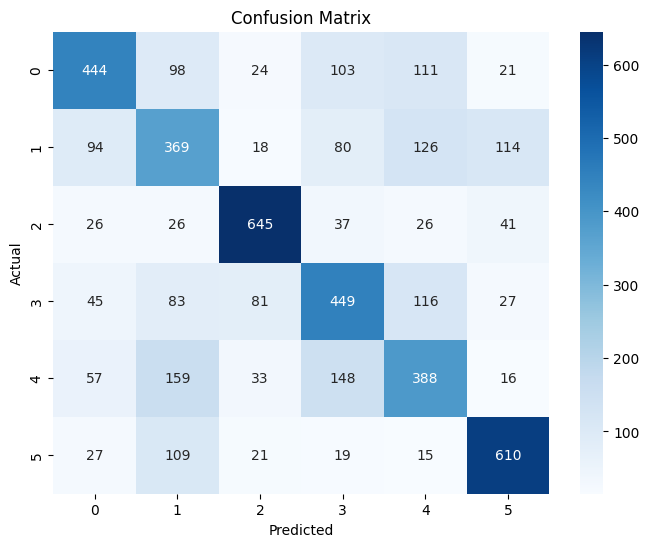

In [6]:
cm = confusion_matrix(y_label, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [10]:
y_true = label_binarize(y_label, classes=[i for i in range(len(classes))])
y_score = label_binarize(y_pred, classes=[i for i in range(len(classes))])

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [12]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

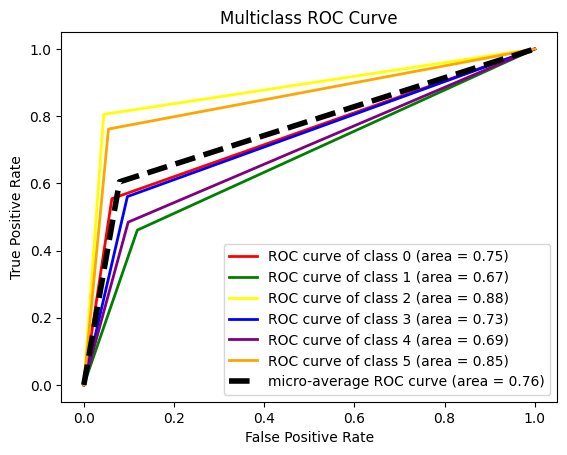

In [15]:
plt.figure()
lw = 2
colors = cycle(['red', 'green', 'yellow','blue','purple','orange'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["micro"]),
         color='black', linestyle='--', linewidth=4)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_label, y_pred)
print(report)
